<a href="https://colab.research.google.com/github/JayeshSuryavanshi/Machine-Learning-Projects/blob/main/Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
global_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

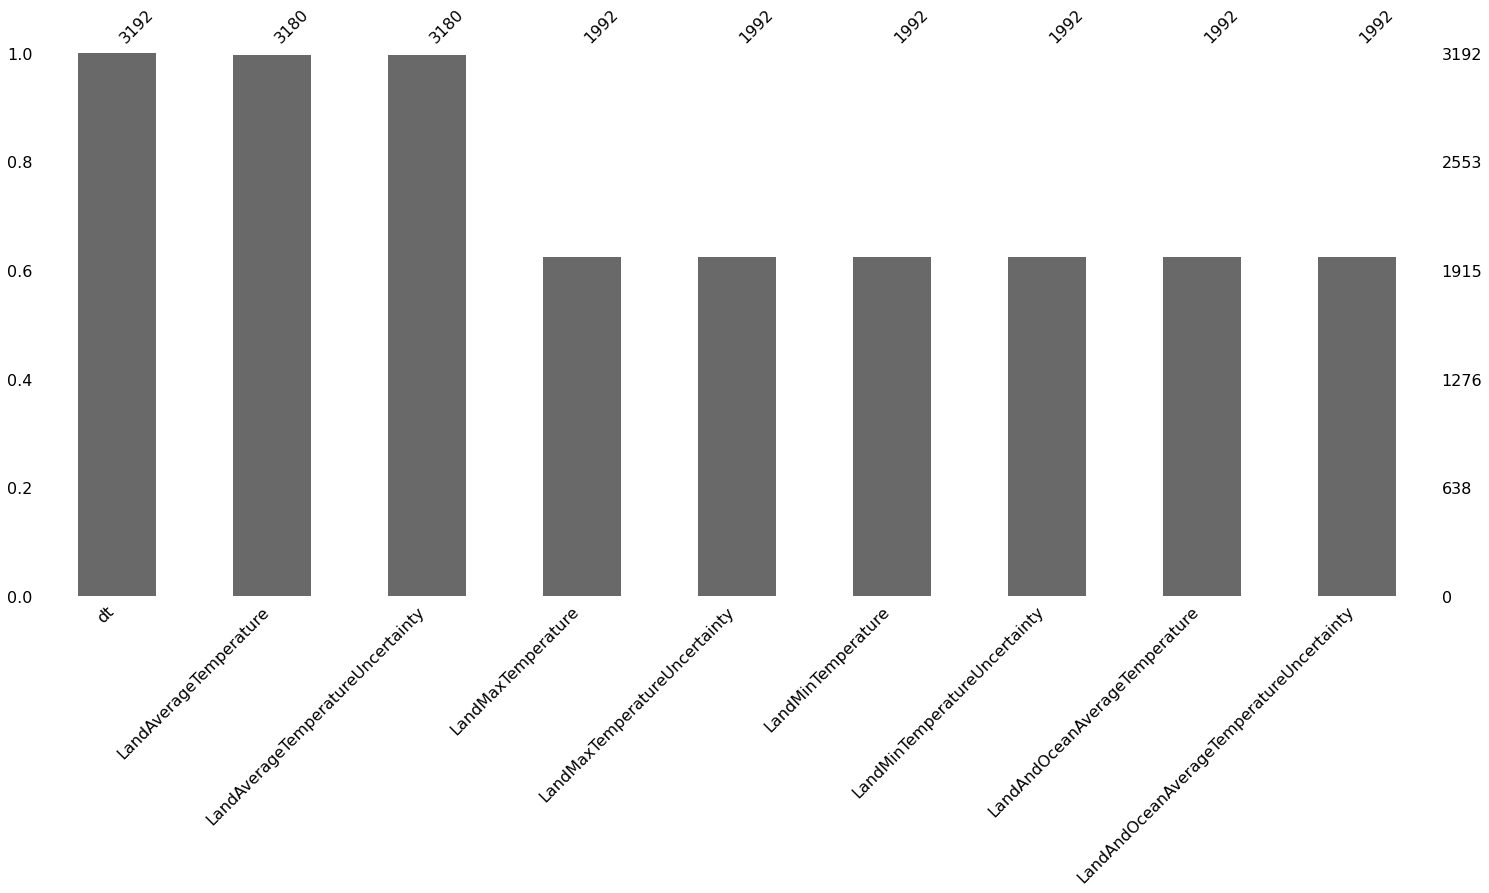

In [4]:
import missingno as msno
msno.bar(global_temp)

Is there Global warming wrt year?

In [5]:
global_temp['dt'][0].split('-')[0]
def fetch_year(date):
    return date.split('-')[0]
global_temp['years']=global_temp['dt'].apply(fetch_year)
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


Grouping data to get more meaningful insights


In [8]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [9]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [10]:
fig = px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='Average land temperature in World')
fig.show()

From this we conclude, Global warming increases in the last decades,as average temperature is more .

In [17]:
new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/GlobalLandTemperaturesByCity.csv')
usa=new_df[new_df['Country']=='United States']
data = ['New York','Los Angeles','San Francisco']
cities = usa[usa['City'].isin(data)]
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [18]:
cities=cities[['dt','AverageTemperature']]
cities.head()
cities.columns=['Date','Temp']
cities.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [21]:
cities['Date']=pd.to_datetime(cities['Date'])
cities.dropna(inplace=True)
cities.set_index('Date',inplace=True)

Whether it is stationary or not:
Conditions:
1.Time series should have a constant mean.
2.Time series should have a constant standard deviation.
3.Time series’s auto-covariance should not depend on time.

In [22]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(cities['Temp'])

In [24]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Test Statistic : -2.0063893036757663
p-value : 0.28377865833333876
#Lags Used : 35
Number of Observations Used : 7037
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -21.239650404910908
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


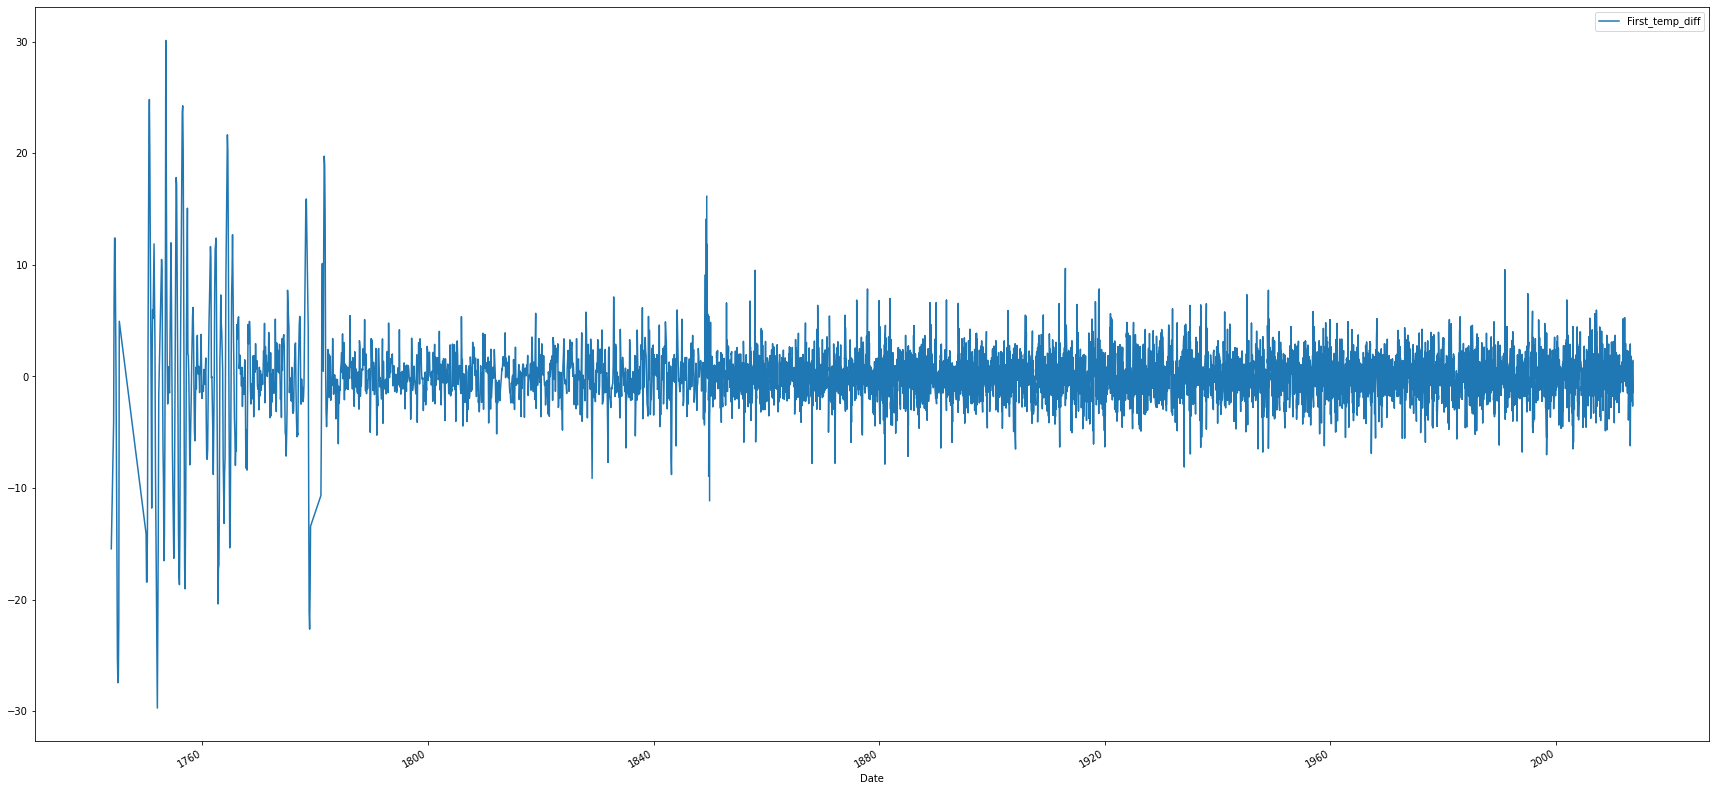

In [28]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(cities['Temp'])
adfuller_test(cities['Temp'])
cities_df = cities.copy()
cities_df['First_temp_diff'] = cities_df['Temp'] - cities_df['Temp'].shift(12)
adfuller_test(cities_df['First_temp_diff'].dropna())
cities_df[['First_temp_diff']].plot(figsize=(30,15))

Build Time series

In [29]:
cities_df.head()

,Temp,First_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [36]:
cities_df = cities_df[['First_temp_diff']]
cities_df.dropna(inplace=True)
cities_df.head()
cities_df['First_temp_diff'].rolling(window=5).mean()
value = pd.DataFrame(cities_df['First_temp_diff'])
temp_df =pd.concat([value,cities_df['First_temp_diff'].rolling(window=5).mean()],axis=1)
temp_df.columns=['actual_temp','forecast_temp']
temp_df.head()

,actual_temp,forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

2.3934235122562058

Using ARIMA

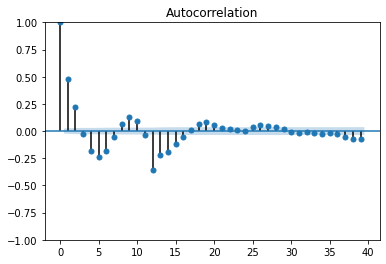

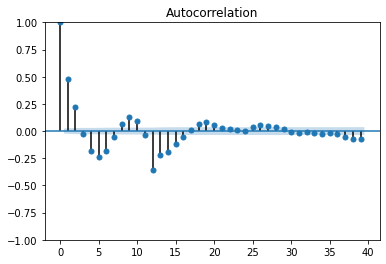

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(cities_df['First_temp_diff'].dropna())

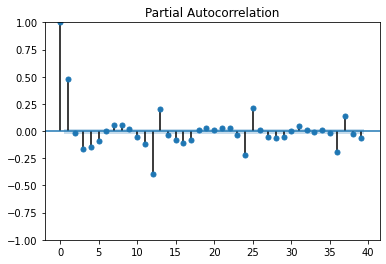

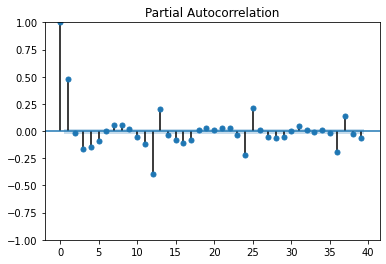

In [39]:
plot_pacf(cities_df['First_temp_diff'].dropna())

In [51]:
training_data=cities_df[0:6000]
test_data = cities_df[6000:]

In [52]:
from statsmodels.tsa.arima.model import ARIMA


In [53]:
arima = ARIMA(training_data,order=(2,1,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency informatio

In [54]:
#fit the model
model= arima.fit()

In [58]:
#predictions 
predictions=model.forecast(steps=len(test_data))
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



6000   -0.626748
6001    0.006957
6002   -0.285221
6003    0.126884
6004   -0.187024
          ...   
7056   -0.003597
7057   -0.003597
7058   -0.003597
7059   -0.003597
7060   -0.003597
Name: predicted_mean, Length: 1061, dtype: float64

In [59]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5109236932140326